In [3]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Cargar el dataset MNIST directamente desde TensorFlow
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Redimensionar y normalizar los datos para el modelo de machine learning
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Entrenar el modelo con Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo de Random Forest: {accuracy:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Accuracy del modelo de Random Forest: 0.9692


In [7]:
import joblib

# Guardar el modelo entrenado en un archivo .joblib
joblib.dump(rf_model, 'random_forest_mnist_model.joblib')


['random_forest_mnist_model.joblib']

In [ ]:
# Cargar el modelo desde el archivo .joblib
rf_model = joblib.load('random_forest_mnist_model.joblib')


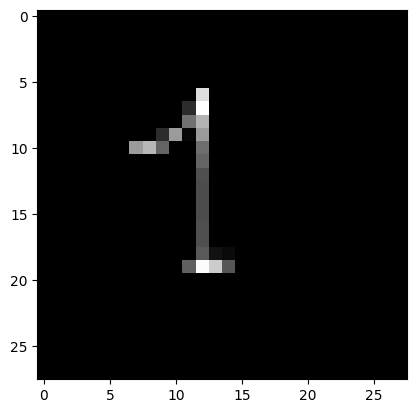

El modelo predice que la imagen es un: 7


In [4]:
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Cargar el modelo entrenado desde el archivo .joblib
model = joblib.load('random_forest_mnist_model.joblib')

# Función para preprocesar la imagen
def preprocess_image(img_path):
    # Cargar la imagen en escala de grises
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Verificar si la imagen fue cargada correctamente
    if img is None:
        raise ValueError(f"No se pudo cargar la imagen desde la ruta: {img_path}")
    
    # Redimensionar la imagen a 28x28 píxeles
    img_resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    
    # Invertir los colores si la imagen es negra sobre fondo blanco (opcional)
    img_resized = 255 - img_resized
    
    # Mostrar la imagen preprocesada
    plt.imshow(img_resized, cmap='gray')
    plt.show()
    
    # Aplanar la imagen a un array 1D y normalizarla
    img_resized = img_resized.flatten().astype('float32') / 255.0
    
    # Redimensionar a la forma esperada por el modelo (1, 784)
    img_resized = np.expand_dims(img_resized, axis=0)
    
    return img_resized

# Ruta de la imagen que deseas probar (reemplaza con la ruta de tu imagen)
img_path = 'image.png'

# Preprocesar la imagen
img_preprocessed = preprocess_image(img_path)

# Hacer la predicción
prediction = model.predict(img_preprocessed)

# Mostrar la predicción
print(f"El modelo predice que la imagen es un: {prediction[0]}")


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Cargar el dataset MNIST directamente desde TensorFlow
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocesar los datos para el modelo de deep learning
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Crear el modelo de deep learning
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Accuracy del modelo de Deep Learning: {test_acc:.4f}")

# Guardar el modelo
model.save('deep_learning_mnist_model.h5')


Epoch 1/5


/Users/luis/Desktop/ANYONE/ModelImporting/ModelEnv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8471 - loss: 0.5133 - val_accuracy: 0.9824 - val_loss: 0.0579
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9821 - loss: 0.0587 - val_accuracy: 0.9863 - val_loss: 0.0405
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9882 - loss: 0.0380 - val_accuracy: 0.9856 - val_loss: 0.0452
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9912 - loss: 0.0277 - val_accuracy: 0.9851 - val_loss: 0.0473
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9920 - loss: 0.0245 - val_accuracy: 0.9905 - val_loss: 0.0331
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9866 - loss: 0.0426


Accuracy del modelo de Deep Learning: 0.9905
